# DATA VISUALIZATION

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import requests
import plotly.express as px
import datetime

In [25]:
city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()

In [26]:
def get_city_data(city):
    city_bike_networks = requests.get("http://api.citybik.es/v2/networks").json()
    
    list_of_dicts = []
    for city_bike_dict in city_bike_networks['networks']:
        new_city = city_bike_dict['location']['city']
        if new_city.lower() == city.lower():
            list_of_dicts.append(city_bike_dict)
            
    return list_of_dicts

In [27]:
city_names = ['Stavnger', 'Copenhagen', 'Utrecht', 'Alma de Murcia', 'Aranjuez', 'Paris']

for each_city in city_names:
    print(get_city_data(each_city))
    print("-------------------\n")

[]
-------------------

[]
-------------------

[]
-------------------

[]
-------------------

[]
-------------------

[{'company': None, 'ebikes': True, 'gbfs_href': 'https://velib-metropole-opendata.smoove.pro/opendata/Velib_Metropole/gbfs.json', 'href': '/v2/networks/velib', 'id': 'velib', 'license': {'name': 'OPEN LICENCE 2.0', 'url': 'etalab.gouv.fr/wp-content/uploads/2018/11/open-licence.pdf'}, 'location': {'city': 'Paris', 'country': 'FR', 'latitude': 48.856614, 'longitude': 2.3522219}, 'name': "Vélib' Métropole"}]
-------------------



In [28]:
get_city_data("Antwerpen")

[{'company': ['ClearChannel'],
  'href': '/v2/networks/velo-antwerpen',
  'id': 'velo-antwerpen',
  'location': {'city': 'Antwerpen',
   'country': 'BE',
   'latitude': 51.216667,
   'longitude': 4.4},
  'name': 'Velo Antwerpen'}]

In [29]:
def get_stations_info(city):
    
    station_dict = get_city_data(city)
    if not station_dict:
        print("Error: No bike company found for {}".format(city))
        return None
    
    network_address = station_dict[0]['href']
    url = "http://api.citybik.es/{}".format(network_address)
    return requests.get(url).json()['network']['stations']

In [30]:
city = "Antwerpen"
station_info = get_stations_info(city)
station_info

[{'empty_slots': 23,
  'extra': {'address': 'Koningin Astridplein', 'status': 'OPN', 'uid': 1},
  'free_bikes': 10,
  'id': '670e2836abf87ddc702ad790abaf8f10',
  'latitude': 51.21782,
  'longitude': 4.42065,
  'name': '001- Centraal Station - Astrid',
  'timestamp': '2023-01-04T23:56:11.749000Z'},
 {'empty_slots': 27,
  'extra': {'address': 'Groenkerkhofstraat/Nationalestraat',
   'status': 'OPN',
   'uid': 20},
  'free_bikes': 0,
  'id': 'ebdaa116e2ddfb4a3010a2847e69f60f',
  'latitude': 51.2188,
  'longitude': 4.401,
  'name': '020- Groenplaats 2',
  'timestamp': '2023-01-04T23:56:11.764000Z'},
 {'empty_slots': 1,
  'extra': {'address': 'sint vincentius', 'status': 'OPN', 'uid': 93},
  'free_bikes': 29,
  'id': '7cc97751ec977d34fc265b65aa88732c',
  'latitude': 51.20541,
  'longitude': 4.41356,
  'name': '093- Sint Vincentius',
  'timestamp': '2023-01-04T23:56:11.823000Z'},
 {'empty_slots': 10,
  'extra': {'address': 'Paleisstraat ', 'status': 'OPN', 'uid': 94},
  'free_bikes': 23,
  '

In [ ]:
def get_available_stations(city = "Antwerpen"):
    station_info = get_stations_info(city)
    
    station_list = []
    for info in station_info:
        
        a_dict = {
            'Station Name': info['name'],
            'empty_slots': info['empty_slots'],
            'free_bikes': info['free_bikes'],
            'payment': ', '.join(info['extra']['address']) if info['extra']['status'] else "No",
            'latitude': info['latitude'],
            'longitudee': info['longitude'],
            'timestamp': info['timestamp'],
            'Unique ID': info['extra']['uid'],
        }
        station_list.append(a_dict)
    return pd.DataFrame(station_list)

In [31]:
# Show available stations in Antwerpen
get_available_stations(city = "Antwerpen").sample(5)

,Station Name,empty_slots,free_bikes,payment,latitude,longitudee,timestamp,Unique ID
0,001- Centraal Station - Astrid,23,10,"K, o, n, i, n, g, i, n, , A, s, t, r, i, d, p...",51.21782,4.42065,2023-01-04T23:56:11.749000Z,1
216,248- De Schans,12,24,"D, e, , S, c, h, a, n, s",51.20598,4.44925,2023-01-04T23:56:11.932000Z,248
90,088- Haantjeslei,12,9,"V, a, n, , T, r, i, e, r, s, t, r, a, a, t, ...",51.20114,4.40221,2023-01-04T23:56:11.819000Z,88
149,152- Blancefloerlaan,30,6,"B, l, a, n, c, e, f, l, o, e, r, l, a, a, n",51.22007,4.37559,2023-01-04T23:56:11.873000Z,152
231,263- Fruithoflaan 2,26,10,"F, r, u, i, t, h, o, f, l, a, a, n, , -, , J...",51.18453,4.44104,2023-01-04T23:56:11.943000Z,263


# Show Map

In [32]:
current_date = datetime.date.today()
current_date

datetime.date(2023, 1, 4)

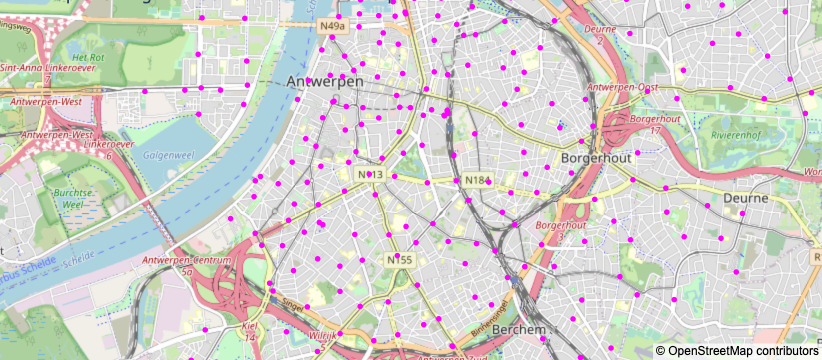

In [33]:
def show_map(station_info):
    
# Let's get the current date and time
    current_date = pd.to_datetime(station_info['timestamp'][0]).strftime('%a %d %B, %Y at %H:%M')

map_title = 'Map showing Number of Bikes in {} at {}'.format(city, current_date)

# Access token from plotly
#px.set_mapbox_access_token(ACCESS_MAP_TOKEN)

#fig = px.scatter_mapbox(station_data, lat="latitude", lon="longtitude", hover_name="Station Name", color="free_bikes",
                        #hover_data=["empty_slots", "free_bikes", "payment"],
                         #title=map_title,
fig = px.scatter_mapbox(station_info, lat="latitude", lon="longitude", hover_name="name", hover_data=["empty_slots", "free_bikes"],
                        title=map_title,
                        color_discrete_sequence=["fuchsia"], zoom=12, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()                      
#color_continuous_scale=px.colors.sequential.Plasma, size_max=20,zoom=12)
              

In [34]:
live_station_data = get_available_stations("Antwerpen")
show_map(live_station_data)

In [35]:
live_station_data

,Station Name,empty_slots,free_bikes,payment,latitude,longitudee,timestamp,Unique ID
0,001- Centraal Station - Astrid,23,10,"K, o, n, i, n, g, i, n, , A, s, t, r, i, d, p...",51.21782,4.42065,2023-01-04T23:56:11.749000Z,1
1,020- Groenplaats 2,27,0,"G, r, o, e, n, k, e, r, k, h, o, f, s, t, r, a...",51.21880,4.40100,2023-01-04T23:56:11.764000Z,20
2,093- Sint Vincentius,1,29,"s, i, n, t, , v, i, n, c, e, n, t, i, u, s",51.20541,4.41356,2023-01-04T23:56:11.823000Z,93
3,094- Paleisstraat,10,23,"P, a, l, e, i, s, s, t, r, a, a, t,",51.20480,4.39610,2023-01-04T23:56:11.823000Z,94
4,101- Premetro Handel,23,12,"L, a, n, g, e, , S, t, u, i, v, e, n, b, e, r...",51.22410,4.43200,2023-01-04T23:56:11.828000Z,101
...,...,...,...,...,...,...,...,...
298,335- Speelplein,24,12,"S, p, e, e, l, p, l, e, i, n, s, t, r, a, a, t...",51.24822,4.44424,2023-01-04T23:56:11.996000Z,335
299,336 -Sneeuwbeslaan,21,15,"S, n, e, e, u, w, b, e, s, l, a, a, n, /, L, a...",51.17571,4.39622,2023-01-04T23:56:11.997000Z,336
300,337 - Verenigde Naties,12,12,"V, e, r, e, n, i, g, d, e, , N, a, t, i, e, s...",51.16379,4.35336,2023-01-04T23:56:11.998000Z,337
301,340 - Dokter Donny,25,11,"D, o, k, t, e, r, , D, o, n, n, y, p, l, e, i, n",51.16813,4.40497,2023-01-04T23:56:11.999000Z,340


# Data exploration

In [36]:
live_station_data.corr()

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_48272/1650952359.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,empty_slots,free_bikes,latitude,longitudee,Unique ID
empty_slots,1.000000,-0.737250,-0.116549,-0.166302,0.288248
free_bikes,-0.737250,1.000000,0.062403,0.170679,-0.067346
latitude,-0.116549,0.062403,1.000000,0.434638,-0.339233
longitudee,-0.166302,0.170679,0.434638,1.000000,-0.020948
Unique ID,0.288248,-0.067346,-0.339233,-0.020948,1.000000


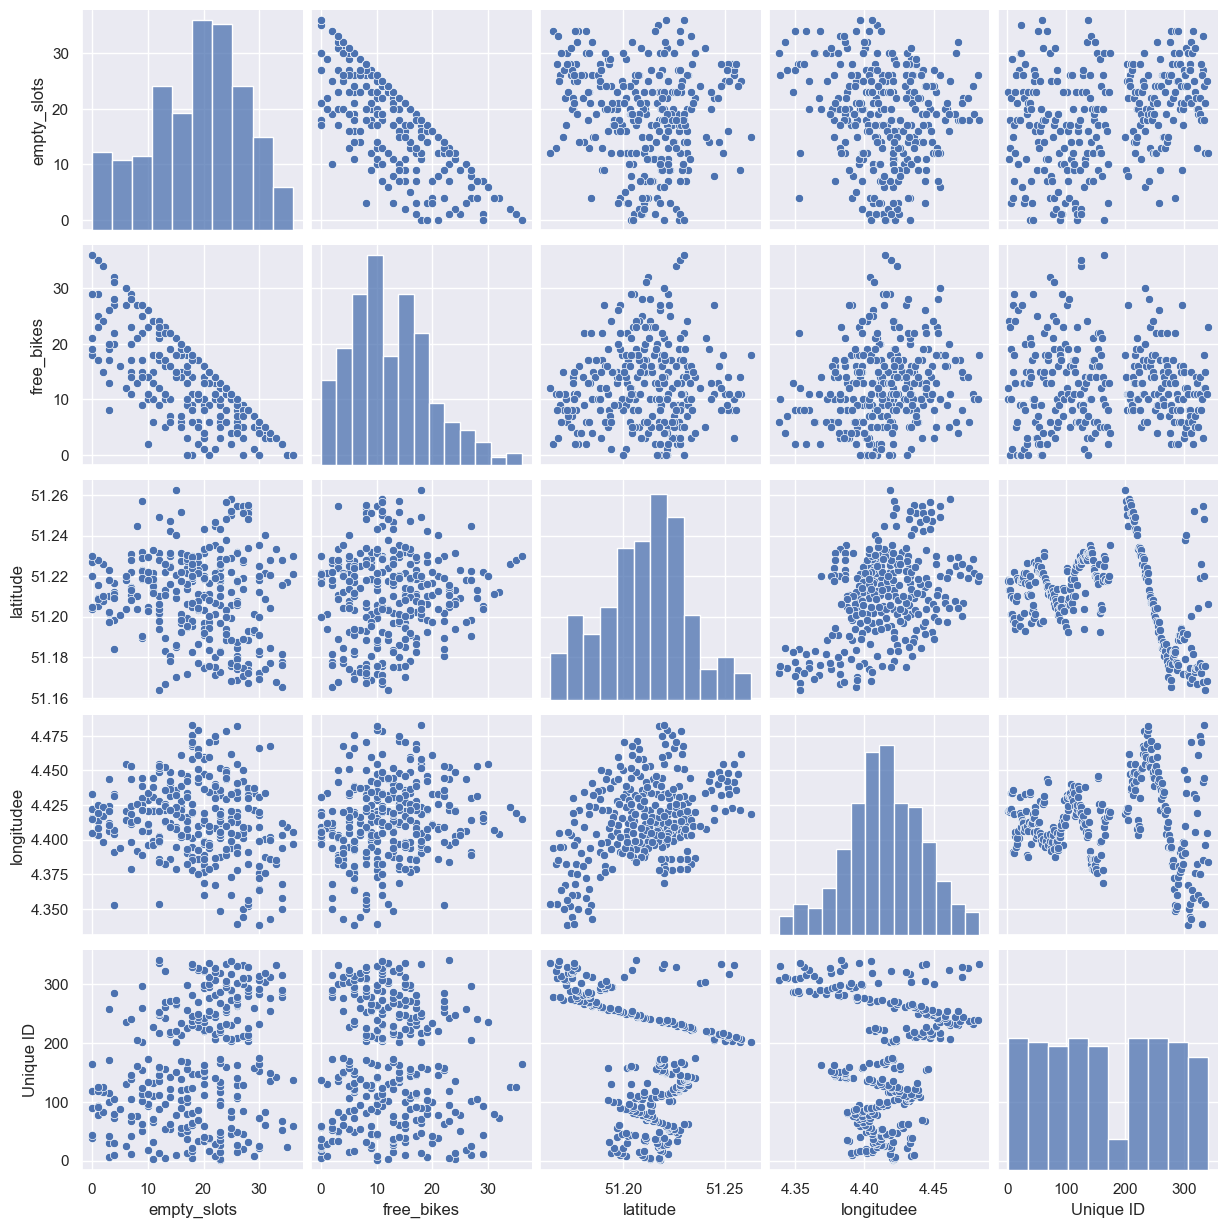

In [51]:
sns.pairplot(data=live_station_data)
plt.show()

In [52]:
X = live_station_data[live_station_data.columns[~live_station_data.columns.isin(['free_bikes'])]]
y = live_station_data['free_bikes']

In [53]:
X.shape
X.head()

,Station Name,empty_slots,payment,latitude,longitudee,timestamp,Unique ID
0,001- Centraal Station - Astrid,23,"K, o, n, i, n, g, i, n, , A, s, t, r, i, d, p...",51.21782,4.42065,2023-01-04T23:56:11.749000Z,1
1,020- Groenplaats 2,27,"G, r, o, e, n, k, e, r, k, h, o, f, s, t, r, a...",51.21880,4.40100,2023-01-04T23:56:11.764000Z,20
2,093- Sint Vincentius,1,"s, i, n, t, , v, i, n, c, e, n, t, i, u, s",51.20541,4.41356,2023-01-04T23:56:11.823000Z,93
3,094- Paleisstraat,10,"P, a, l, e, i, s, s, t, r, a, a, t,",51.20480,4.39610,2023-01-04T23:56:11.823000Z,94
4,101- Premetro Handel,23,"L, a, n, g, e, , S, t, u, i, v, e, n, b, e, r...",51.22410,4.43200,2023-01-04T23:56:11.828000Z,101


In [54]:
y.tail()

298    12
299    15
300    12
301    11
302    23
Name: free_bikes, dtype: int64

In [57]:
import pandas as pd
import statsmodels.formula.api as smf

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_48272/1251829298.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

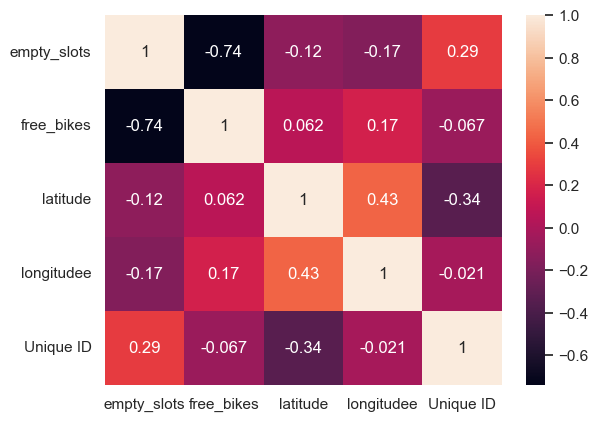

In [37]:
sns.heatmap(live_station_data.corr(),annot=True)

In [38]:
corr_matrix = live_station_data.corr()
corr_matrix = ["y"].sort(reverse=False)

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_48272/1128504304.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



# Visualizations

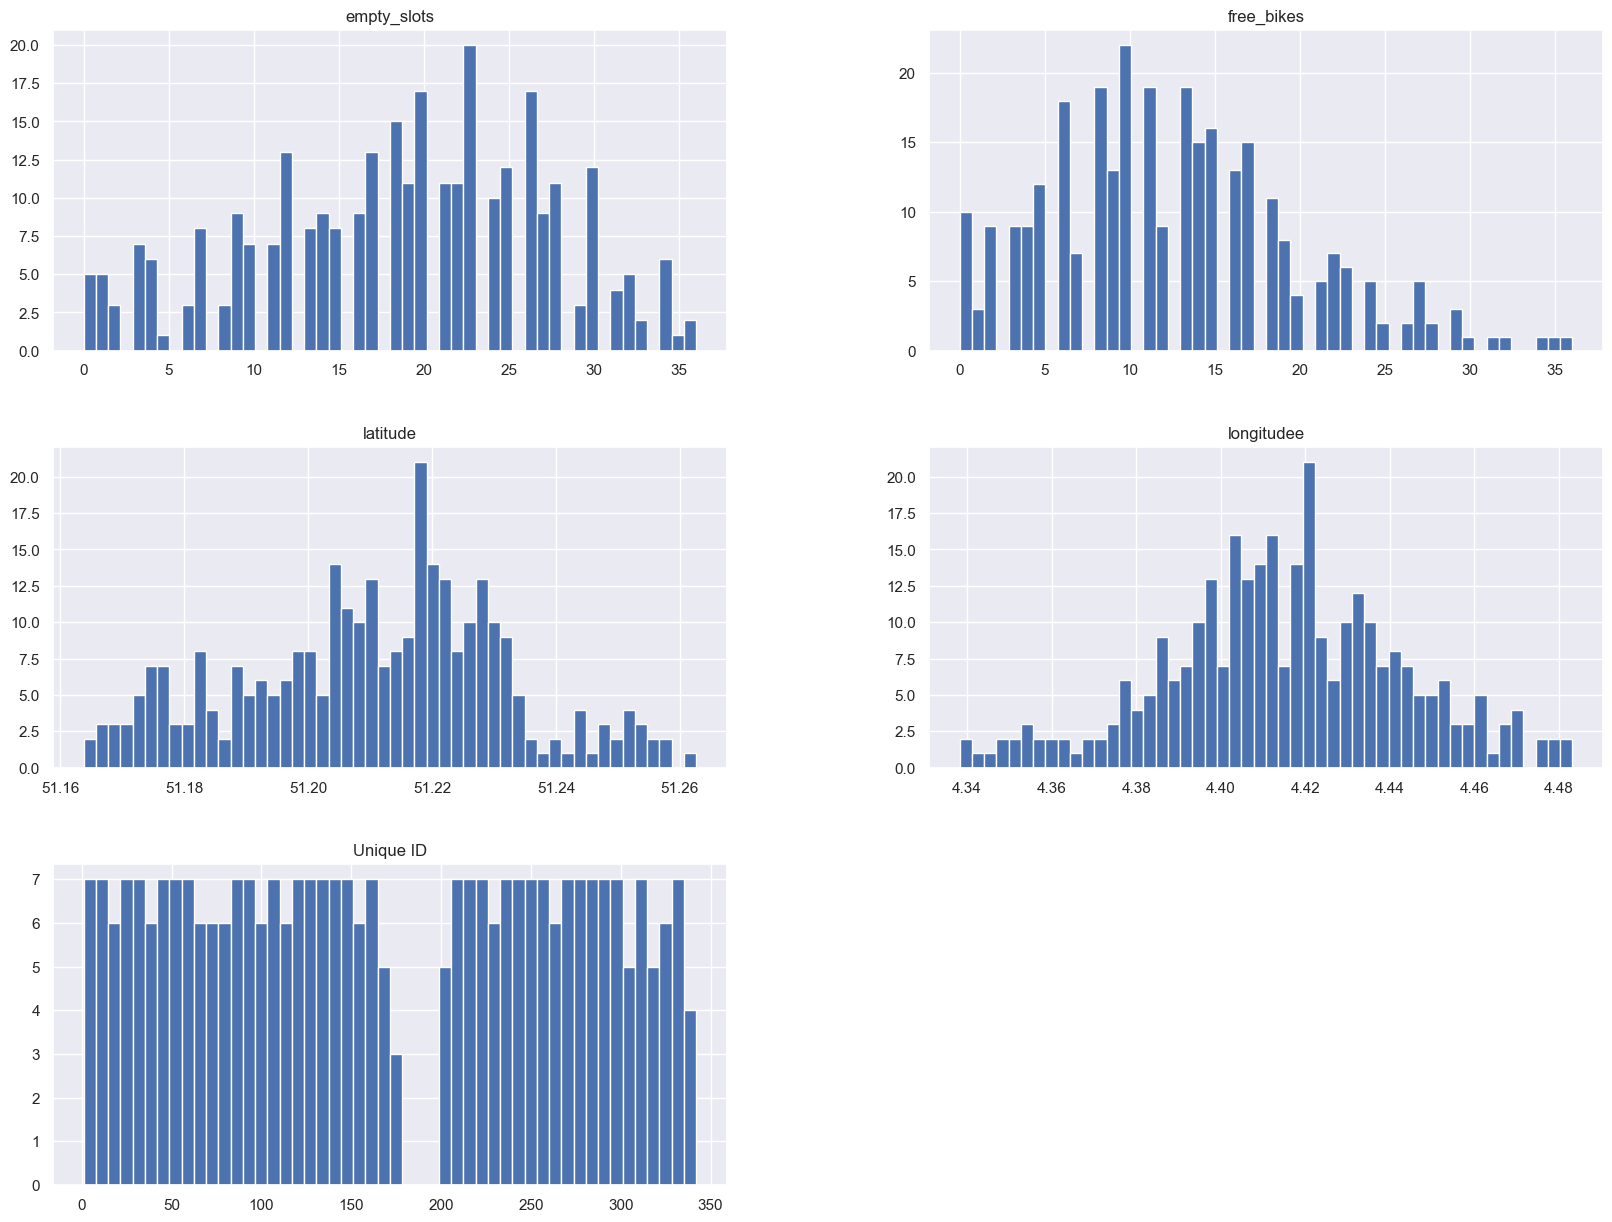

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
live_station_data.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

<AxesSubplot:xlabel='free_bikes', ylabel='Count'>

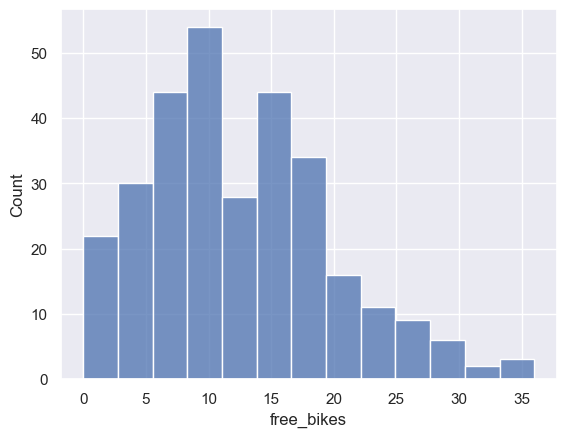

In [60]:
sns.histplot(live_station_data['free_bikes'])

/var/folders/nf/rr1y3sz51_d8gbgc735ltjtc0000gn/T/ipykernel_48272/4132102992.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



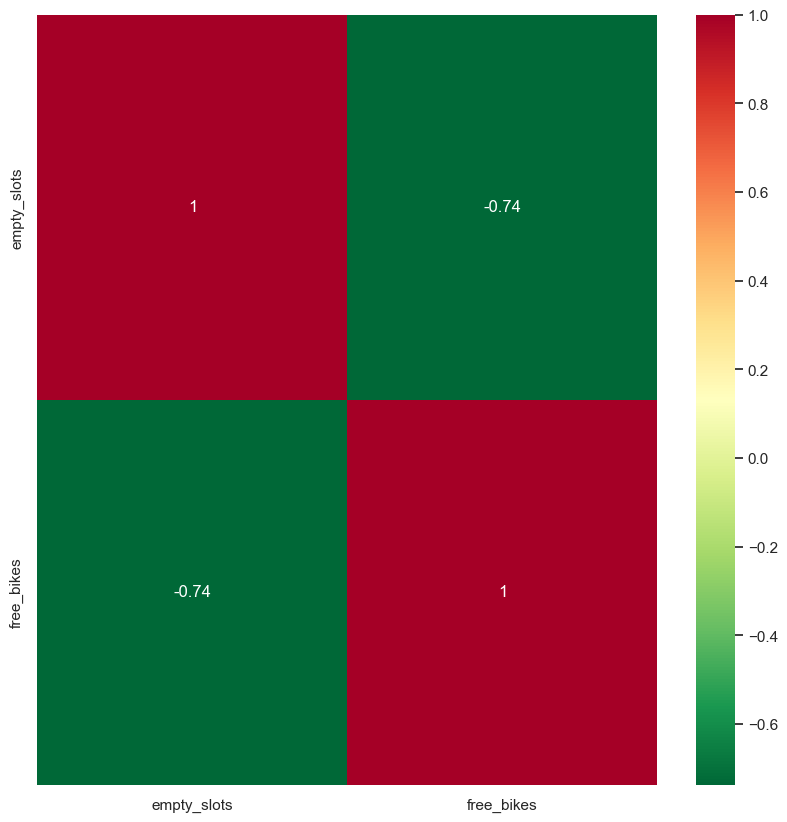

In [64]:
cormat = live_station_data.corr()
top_corr_features = cormat.index[abs(cormat["free_bikes"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(live_station_data[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

# BOXPLOTS

<AxesSubplot:ylabel='free_bikes'>

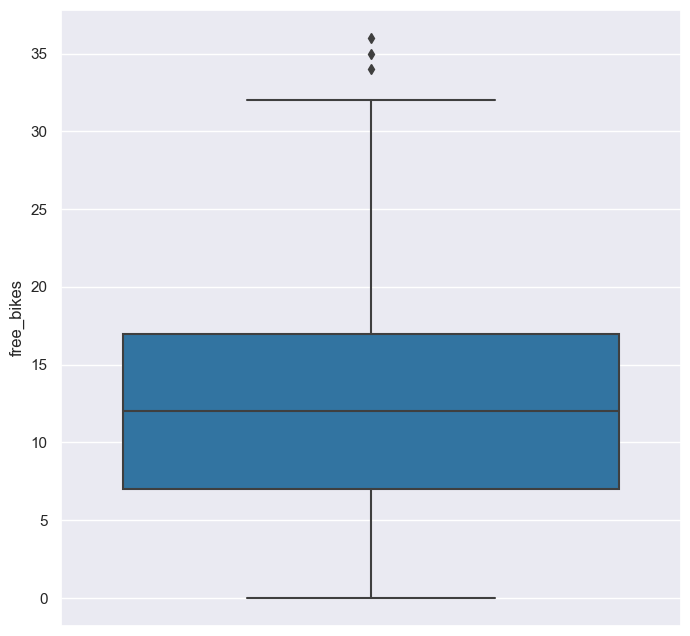

In [62]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=live_station_data.free_bikes, color='tab:blue')

<AxesSubplot:ylabel='empty_slots'>

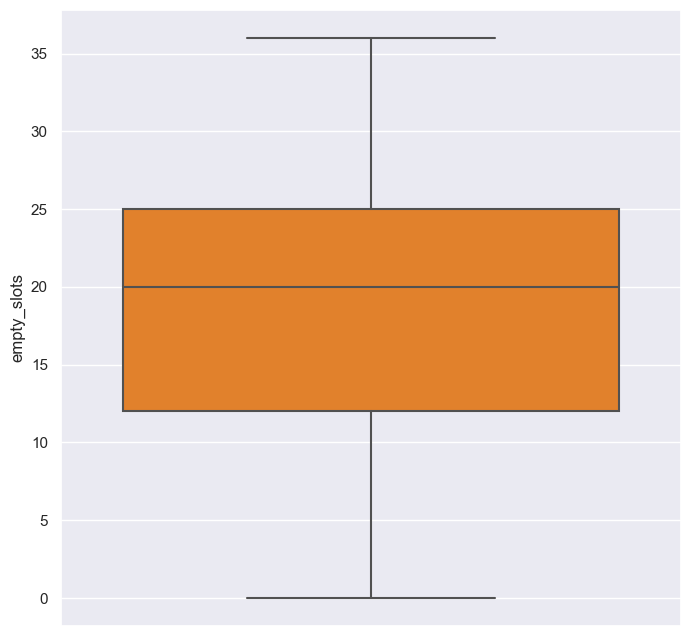

In [63]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.set(style="dark")
sns.set(style="darkgrid", color_codes=True)
sns.boxplot(y=live_station_data.empty_slots, color='tab:orange')